<a href="https://colab.research.google.com/github/Rajan-sust/MultiArmedBandit/blob/main/Mushroom_dataset_UCI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ref:
[1] https://github.com/gdmarmerola/interactive-intro-rl/blob/master/notebooks/ts_for_mushroom_bandit.ipynb

[2] https://github.com/david-cortes/contextualbandits

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cols = ['edible','cap-shape','cap-surface','cap-color','bruises','odor',
        'gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
        'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [ ]:
df = pd.read_csv('agaricus-lepiota.data', names=cols)
df = df.replace("?", np.nan)
df = df.dropna()

In [ ]:
df.shape

(5644, 23)

In [ ]:
df.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
y = df['edible'].apply(lambda x : {'p' : 0, 'e' : 1}[x])
X = df.drop(['edible'], axis=1)
X = pd.get_dummies(X)


In [ ]:
y = y.to_list()
X = X.to_numpy()

In [ ]:
# !pip install contextualbandits

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from copy import deepcopy
from contextualbandits.online import ActiveExplorer, AdaptiveGreedy
import numpy as np


In [ ]:
dir(ActiveExplorer)

In [ ]:
model = AdaptiveGreedy(base_algorithm=deepcopy(SGDClassifier(random_state=0, loss='log')), nchoices=2,
                       smoothing=(1,2), beta_prior = None, decay_type = 'percentile', decay = 0.9997,
                       batch_train = True, random_state = 4444)


In [ ]:
track = dict()
cnt = 0
for i in range(0, 500):
  context = np.array([X[i]])
  # print(context)
  action = np.array([model.predict(context)])
  if action[0][0] == y[i]:
    cnt += 1
  reward = np.array([[int(action[0][0] == y[i])]])
  print(i + 1, cnt)
  track[i + 1] = cnt
  model.partial_fit(context, action, reward)

1 1
2 1
3 2
4 2
5 2
6 2
7 3
8 4
9 4
10 5
11 6
12 7
13 8
14 8
15 9
16 10
17 11
18 11
19 12
20 12
21 13
22 14
23 15
24 16
25 17
26 18
27 19
28 20
29 20
30 21
31 22
32 23
33 24
34 25
35 26
36 27
37 28
38 28
39 29
40 30
41 31
42 32
43 32
44 33
45 34
46 35
47 36
48 37
49 38
50 39
51 39
52 40
53 41
54 42
55 43
56 44
57 45
58 46
59 47
60 48
61 49
62 50
63 51
64 52
65 53
66 54
67 55
68 56
69 57
70 57
71 58
72 59
73 60
74 60
75 61
76 62
77 63
78 64
79 64
80 65
81 66
82 66
83 67
84 68
85 69
86 70
87 71
88 72
89 73
90 74
91 74
92 75
93 76
94 77
95 78
96 79
97 80
98 81
99 82
100 83
101 84
102 85
103 86
104 87
105 88
106 89
107 90
108 91
109 92
110 93
111 94
112 95
113 96
114 97
115 97
116 98
117 98
118 99
119 100
120 101
121 101
122 102
123 103
124 104
125 105
126 106
127 107
128 108
129 109
130 110
131 111
132 112
133 113
134 114
135 115
136 116
137 117
138 118
139 119
140 120
141 121
142 122
143 123
144 124
145 125
146 126
147 127
148 128
149 129
150 130
151 131
152 132
153 133
154 134
155 135
1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x, fx = [], []
for key, val in track.items():
  x.append(key)
  fx.append(val)

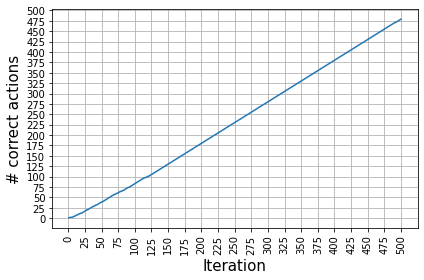

In [ ]:
plt.plot(x, fx)
plt.ylabel('# correct actions', fontsize=15)
plt.xlabel('Iteration', fontsize=15)
plt.grid()
plt.xticks(np.arange(0, 501, 25), rotation=90)
plt.yticks(np.arange(0, 501, 25))
plt.tight_layout()
# plt.show()
plt.savefig('mushroom_result.png')